Ноздрова В. С.

Группа ИУ5-61Б

Вариант 15




# Задача №2.

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Используемый набор данных: [SF Restaurant Scores](https://www.kaggle.com/datasets/san-francisco/sf-restaurant-scores-lives-standard)



---



## Загрузка данных

Набор данных содержит следующие колонки:



*   business_id - ID ресторана
*   business_name - название ресторана
*   business_address - адрес ресторана
*   business_city - город, в котором зарегистрирован бизнес
*   business_state - штат, в котором зарегистрирован бизнес
*   business_postal_code - почтовый код
*   business_latitude - широта
*   business_longitude - долгота
*   business_location - географические координаты
*   business_phone_number - номер телефона
*   inspection_id - id инспекции
*   inspection_date - дата инспекции
*   inspection_score - оценка ресторана по стобалльной шкале
*   inspection_type - тип инспекции
*   violation_id - id нарушения
*   violation_description - описание нарушения
*   risk_category - категория риска
*   Neighborhoods (old) - номер района
*   Police Districts -  номер полицейского участка
*   Supervisor Districts - номер участка инспектирования
*   Fire Prevention Districts - номер пожарного участка
*   Zip Codes - почтовый индекс
*   Analysis Neighborhoods - номер района анализа






In [2]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка датасета
data = pd.read_csv('drive/MyDrive/Colab Notebooks/RK1.csv')

In [3]:
# Первые 5 строк датасета
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Размер датасета
print('Строк: {}'.format(data.shape[0]))
print('Колонок: {}'.format(data.shape[1]))

Строк: 53973
Колонок: 23


In [5]:
# Типы колонок
data.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

## Обработка пропусков

Проверим, есть ли в наборе данных пропущенные значения:

In [9]:
# Количество пропущенных значений
data.isnull().sum()

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1018
business_latitude            19556
business_longitude           19556
business_location            19556
business_phone_number        36938
inspection_id                    0
inspection_date                  0
inspection_score             13610
inspection_type                  0
violation_id                 12870
violation_description        12870
risk_category                12870
Neighborhoods (old)          19594
Police Districts             19594
Supervisor Districts         19594
Fire Prevention Districts    19646
Zip Codes                    19576
Analysis Neighborhoods       19594
dtype: int64

In [10]:
# Количество пропущенных значений в процентах
round(data.isnull().sum()/data.shape[0]*100,2)

business_id                   0.00
business_name                 0.00
business_address              0.00
business_city                 0.00
business_state                0.00
business_postal_code          1.89
business_latitude            36.23
business_longitude           36.23
business_location            36.23
business_phone_number        68.44
inspection_id                 0.00
inspection_date               0.00
inspection_score             25.22
inspection_type               0.00
violation_id                 23.85
violation_description        23.85
risk_category                23.85
Neighborhoods (old)          36.30
Police Districts             36.30
Supervisor Districts         36.30
Fire Prevention Districts    36.40
Zip Codes                    36.27
Analysis Neighborhoods       36.30
dtype: float64

Выберем категориальные колонки с пропущенными значениями:

In [43]:
cat_cols = []
print('{:25}  {:10} {}'.format('Колонка', 'Тип', 'Количество пустых значений'))
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('{:25}  {:10} {} ({}%)'.format(col, dt, temp_null_count, temp_perc))

Колонка                    Тип        Количество пустых значений
business_postal_code       object     1018 (1.89%)
business_location          object     19556 (36.23%)
violation_id               object     12870 (23.85%)
violation_description      object     12870 (23.85%)
risk_category              object     12870 (23.85%)


Для заполнения пропусков выберем колонку 'risk_category':

In [44]:
data['risk_category'].unique()

array([nan, 'Moderate Risk', 'High Risk', 'Low Risk'], dtype=object)

Так как для строк, в которых отсутствуют значения в колонке 'risk_category', нет информации о нарушениях (значения в колонках 'violation_id' и 'violation_description' так же отсутствуют), то заполним пропуски константой 'No Risk':

In [46]:
# Импьютация константой
data['risk_category'] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='No Risk').fit_transform(data[['risk_category']])
data['risk_category'].unique()

array(['No Risk', 'Moderate Risk', 'High Risk', 'Low Risk'], dtype=object)

Выберем числовые колонки с пропущенными значениями:

In [14]:
num_cols = []
print('{:25}  {:10} {}'.format('Колонка', 'Тип', 'Количество пустых значений'))
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('{:25}  {:10} {} ({}%)'.format(col, dt, temp_null_count, temp_perc))

Колонка                    Тип        Количество пустых значений
business_latitude          float64    19556 (36.23%)
business_longitude         float64    19556 (36.23%)
business_phone_number      float64    36938 (68.44%)
inspection_score           float64    13610 (25.22%)
Neighborhoods (old)        float64    19594 (36.3%)
Police Districts           float64    19594 (36.3%)
Supervisor Districts       float64    19594 (36.3%)
Fire Prevention Districts  float64    19646 (36.4%)
Zip Codes                  float64    19576 (36.27%)
Analysis Neighborhoods     float64    19594 (36.3%)


Для заполнения пропусков выберем колонку inspection_score:

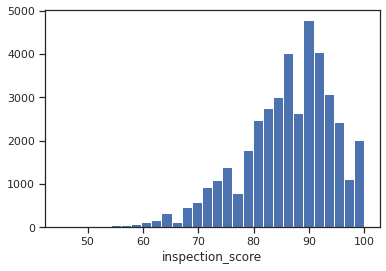

In [34]:
plt.hist(data['inspection_score'], 30)
plt.xlabel('inspection_score')
plt.show()

Заполним отсутствующие значения с использованием импьютации:

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

# Функция, которая позволяет задавать колонку и вид импьютации
def num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    filled_data_imp = data_num_imp
    
    print(column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1])
    return filled_data_imp

Как видно из графика, распределение одномодальное, поэтому выберем стратегию 'most_frequent':

In [39]:
data['inspection_score'] = num_impute_col(data, 'inspection_score', 'most_frequent')

inspection_score most_frequent 13610 90.0 90.0


Проверим заполнение:

In [41]:
data['inspection_score'].isnull().sum()

0

Таким образом, для обработки пропусков в данных для категориального признака было использовано заполнение константой, а для количественного признака - заполнение наиболее частым значением (модой).

## Дополнительное задание

Для пары произвольных колонок данных построить график "Диаграмма рассеяния":

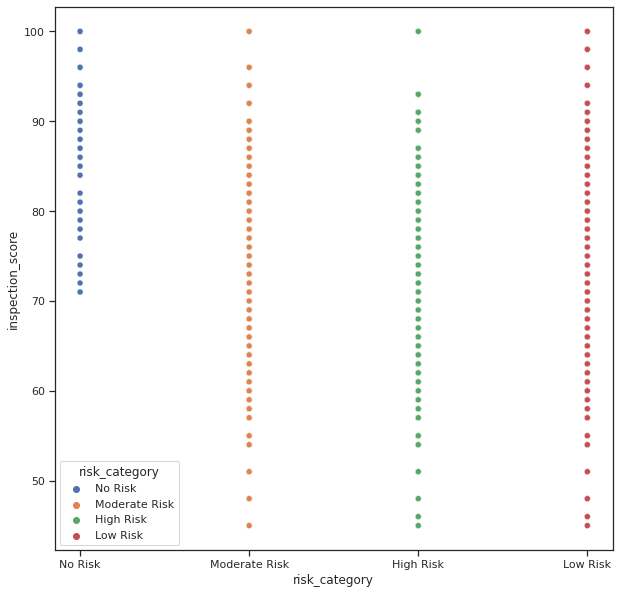

In [56]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='risk_category', y='inspection_score', data=data, hue='risk_category')